In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AutoReg

In [4]:
df = pd.read_csv("supermarket_sales - Sheet1.csv", usecols=["Date", "Total"])
df.index = pd.to_datetime(df.index)

df.resample("D").sum()
x = df["Total"].values
x.shape

(1000,)

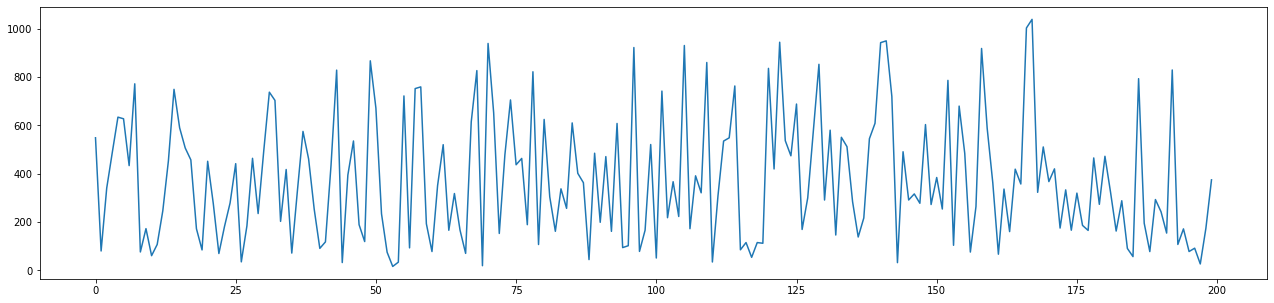

In [5]:
plt.figure(figsize=(22, 5))

plt.plot(df["Total"].values[:200])
plt.show()

In [6]:
# check stationary
from statsmodels.tsa.stattools import adfuller

df_test = adfuller(df["Total"], autolag="AIC")

print("1. ADF : ", df_test[0])
print("2. P-value : ", df_test[1])
print("3. Num of lags : ", df_test[2])
print("4. Num of obs used for ADF reg and critical values calc : ", df_test[3])
print("5. Critical value : ", df_test[4])

for key, val in df_test[4].items():
    print("\t", key, " : ", val)

1. ADF :  -30.603524139206847
2. P-value :  0.0
3. Num of lags :  0
4. Num of obs used for ADF reg and critical values calc :  999
5. Critical value :  {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
	 1%  :  -3.4369127451400474
	 5%  :  -2.864437475834273
	 10%  :  -2.568312754566378


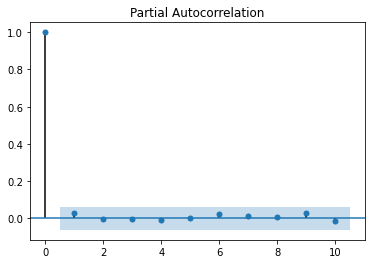

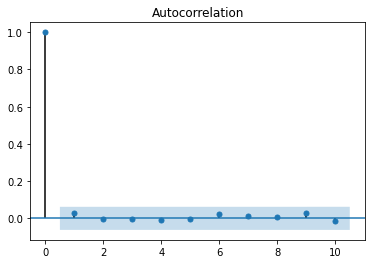

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf = plot_pacf(df["Total"], lags=10)
acf = plot_acf(df["Total"], lags=10)

In [8]:
x.shape

(1000,)

In [9]:
train = x[:len(x) - 7] # 14 days for testing
test = x[len(train):]

x.shape, train.shape, test.shape

((1000,), (993,), (7,))

In [12]:
model = AutoReg(train, lags=10).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  993
Model:                    AutoReg(10)   Log Likelihood               -6799.542
Method:               Conditional MLE   S.D. of innovations            244.251
Date:                Wed, 27 Jan 2021   AIC                             11.021
Time:                        12:53:56   BIC                             11.081
Sample:                            10   HQIC                            11.044
                                  993                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    293.8892     32.210      9.124      0.000     230.758     357.020
y.L1           0.0345      0.032      1.080      0.280      -0.028       0.097
y.L2           0.0009      0.032      0.029      0.977      -0.062       0.064
y.L3          -0.0107      0.032     -0.337      0.736      -0.073       0.052
y.L4          -0.0002      0.032     -0.007      0.995      -0.063       0.062
y.L5          -0.0046      0.032     -0.143      0.886      -0.067       0.058
y.L6           0.0341      0.032      1.068      0.286      -0.028       0.097
y.L7           0.0097      0.032      0.304      0.761      -0.053       0.072
y.L8          -0.0026      0.032     -0.082      0.934      -0.065       0.060
y.L9           0.0339      0.032      1.060      0.289      -0.029       0.097
y.L10         -0.0070      0.032     -0.218      0.827      -0.070       0.056
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.3498           -0.4484j            1.4223           -0.4490
AR.2            -1.3498           +0.4484j            1.4223            0.4490
AR.3            -0.7003           -1.2152j            1.4025           -0.3332
AR.4            -0.7003           +1.2152j            1.4025            0.3332
AR.5             0.2617           -1.4982j            1.5208           -0.2225
AR.6             0.2617           +1.4982j            1.5208            0.2225
AR.7             1.4389           -0.0000j            1.4389           -0.0000
AR.8             1.0581           -1.0473j            1.4887           -0.1242
AR.9             1.0581           +1.0473j            1.4887            0.1242
AR.10            4.8808           -0.0000j            4.8808           -0.0000
------------------------------------------------------------------------------
"""

In [14]:
prediction = model.predict(len(train), len(x)-1, dynamic=False)

[327.62754572 334.55005933 330.21888687 329.79931531 355.67049028
 327.96376102 316.26165208]


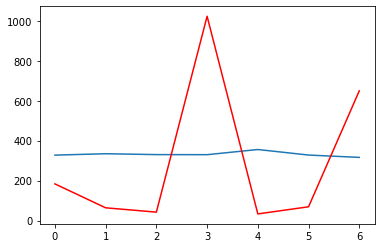

In [15]:
plt.plot(prediction)
plt.plot(test, color="red")

print(prediction)
plt.show()

[327.62754572 334.55005933 330.21888687 329.79931531 355.67049028
 327.96376102 316.26165208]


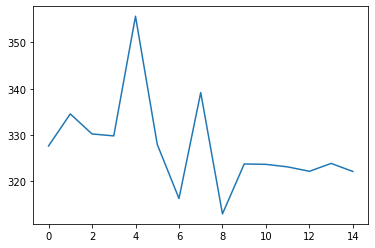

In [16]:
pred_future = model.predict(len(x)+1, len(x) + 7)

plt.plot(pred_future)

print(prediction)
plt.show()

In [17]:
# pip install pmdarima

In [18]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [19]:
stepwise_fit = auto_arima(df["Total"], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=13857.720, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13850.607, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13851.661, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13851.717, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14851.798, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=13853.660, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.031 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                        SARIMAX   Log Likelihood               -6923.304
Date:                Wed, 27 Jan 2021   AIC                          13850.607
Time:                        12:54:14   BIC                          13860.423
Sample:                             0   HQIC                         13854.338
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    322.9667     10.164     31.776      0.000     303.046     342.887
sigma2       6.04e+04   3612.381     16.720      0.000    5.33e+04    6.75e+04
===================================================================================
Ljung-Box (Q):                       33.26   Jarque-Bera (JB):               132.70
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.89
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
df.index = df.Date
df = df.drop(["Date"], axis=1)
df = df[["Total"]]

In [28]:
train = df.iloc[:-7]
test = df.iloc[-7:]

train.shape, test.shape, df.shape

((993, 1), (7, 1), (1000, 1))

In [29]:
model = ARIMA(train, order=(0, 0, 0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Total   No. Observations:                  993
Model:                     ARMA(0, 0)   Log Likelihood               -6870.796
Method:                           css   S.D. of innovations            244.763
Date:                Wed, 27 Jan 2021   AIC                          13745.592
Time:                        12:54:58   BIC                          13755.394
Sample:                             0   HQIC                         13749.319
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        323.1646      7.767     41.606      0.000     307.941     338.388
==============================================================================
"""

In [31]:
pred = model.predict(len(train), len(train) + len(test) -1)
pred

993    323.164559
994    323.164559
995    323.164559
996    323.164559
997    323.164559
998    323.164559
999    323.164559
dtype: float64